# Analisando Bases de Dados do SAEB

Foi utilizado o conjunto de dados disponível [aqui](https://basedosdados.org/dataset/e083c9a2-1cee-4342-bedc-535cbad6f3cd?table=7e387db7-20ba-4130-bb37-83485a62f1bc), pela [Base dos Dados](https://basedosdados.org/).

-> Os slides do Workshop estão [aqui](https://github.com/PyLadiesSP/Cursos/blob/master/Workshops/Workshop%20Analisando%20Dados%20com%20Python%20-%20PyLadiesSP.pdf)!

## Importando os pacotes a serem utilizados

In [39]:
import pandas as pd
from skimpy import skim
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

## Base de Dados

In [3]:
# Este é o caminho do arquivo no Google Drive
file_path = 'drive/My Drive/bq-results-20241007-183458-1728326157391/bq-results-20241007-183458-1728326157391.csv'


# Carregar o arquivo CSV em um DataFrame
df = pd.read_csv(file_path)

In [4]:
df.head()

,ano,sigla_uf,id_aluno,disciplina,escola_publica,preenchimento_caderno,presenca,indicador_proficiencia,proficiencia_saeb,desempenho_aluno,...,possui_eletrecidade,possui_internet,possui_computador,possui_tablet,possui_telefone,possui_celular,escolaridade_mae,escolaridade_pai,escolaridade_pessoa,tempo_chegada_escola
0,2019,SP,39446495,MT,1,1,1,1,261.411186,NaN,...,B,B,B,A,NaN,NaN,F,F,NaN,A
1,2019,SP,38180283,MT,1,1,1,1,137.213123,NaN,...,B,*,A,*,NaN,NaN,F,F,NaN,A
2,2019,SP,39264724,MT,1,1,1,1,160.988155,NaN,...,B,B,B,A,NaN,NaN,C,.,NaN,A
3,2019,SP,39260702,MT,1,0,0,0,NaN,NaN,...,.,.,.,.,NaN,NaN,.,.,NaN,.
4,2019,SP,39441758,LP,1,0,0,0,NaN,NaN,...,.,.,.,.,NaN,NaN,.,.,NaN,.


In [5]:
df.tail()

,ano,sigla_uf,id_aluno,disciplina,escola_publica,preenchimento_caderno,presenca,indicador_proficiencia,proficiencia_saeb,desempenho_aluno,...,possui_eletrecidade,possui_internet,possui_computador,possui_tablet,possui_telefone,possui_celular,escolaridade_mae,escolaridade_pai,escolaridade_pessoa,tempo_chegada_escola
10271733,2019,AM,41019367,MT,1,1,1,1,289.825504,NaN,...,A,A,A,B,NaN,NaN,F,F,NaN,A
10271734,2019,AM,41010808,MT,1,1,1,1,216.576819,NaN,...,A,A,B,B,NaN,NaN,F,F,NaN,A
10271735,2019,AM,41008574,LP,1,1,1,1,269.627316,NaN,...,B,B,A,A,NaN,NaN,E,A,NaN,A
10271736,2019,AM,39455884,LP,1,1,1,1,146.425225,NaN,...,A,A,A,A,NaN,NaN,F,F,NaN,A
10271737,2019,AM,38615423,LP,1,1,1,1,208.990239,NaN,...,B,B,B,A,NaN,NaN,F,B,NaN,A


In [6]:
df.shape

(10271738, 27)

In [7]:
df.columns

Index(['ano', 'sigla_uf', 'id_aluno', 'disciplina', 'escola_publica',
       'preenchimento_caderno', 'presenca', 'indicador_proficiencia',
       'proficiencia_saeb', 'desempenho_aluno', 'preenchimento_questionario',
       'sexo', 'raca_cor', 'idade', 'faixa_etaria',
       'quantidade_pessoas_domicilio', 'possui_moradia_rua_urbanizada',
       'possui_eletrecidade', 'possui_internet', 'possui_computador',
       'possui_tablet', 'possui_telefone', 'possui_celular',
       'escolaridade_mae', 'escolaridade_pai', 'escolaridade_pessoa',
       'tempo_chegada_escola'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10271738 entries, 0 to 10271737
Data columns (total 27 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   ano                            int64  
 1   sigla_uf                       object 
 2   id_aluno                       int64  
 3   disciplina                     object 
 4   escola_publica                 int64  
 5   preenchimento_caderno          int64  
 6   presenca                       int64  
 7   indicador_proficiencia         int64  
 8   proficiencia_saeb              float64
 9   desempenho_aluno               float64
 10  preenchimento_questionario     int64  
 11  sexo                           object 
 12  raca_cor                       object 
 13  idade                          object 
 14  faixa_etaria                   float64
 15  quantidade_pessoas_domicilio   float64
 16  possui_moradia_rua_urbanizada  object 
 17  possui_eletrecidade            object 
 18  

In [9]:
df['disciplina'].value_counts()

,count
disciplina,
MT,5135869
LP,5135869


## Filtros

In [10]:
df['presenca'].value_counts()

,count
presenca,
1,8349546
0,1922192


In [11]:
#Filtro apenas as pessoas que compareceram na prova
df=df[df['presenca']==1]
df.shape

(8349546, 27)

In [12]:
#Filtro apenas as informações da disciplina MT
df_mt=df[df['disciplina']=='MT']
print(df_mt.shape)

(4174773, 27)


## Análise Descritiva

### Média

In [17]:
df_mt['proficiencia_saeb'].mean()

217.8107102307597

### Mediana

In [22]:
df_mt['proficiencia_saeb'].median()

215.816796

### Qual a Faixa de Idade mais frequente? - Moda

In [20]:
df_mt['idade'].mode()

,idade
0,C


In [21]:
df_mt['idade'].value_counts()

,count
idade,
C,963395
B,703015
D,152810
E,52312
.,50750
F,32361
A,12642
*,3844


### Group by

In [28]:
#Média da proficiencia por Faixa de Idade
df_mt.groupby('idade')['proficiencia_saeb'].agg(['count','mean'])

,count,mean
idade,,
*,3789,165.616931
.,45869,191.137659
A,12554,192.681156
B,702001,216.613363
C,961995,215.916894
D,152355,187.761681
E,52121,180.212125
F,32204,175.105000


In [37]:
#Media da proficiencia por tipo de disciplina
df.groupby('disciplina')['proficiencia_saeb'].agg(['count','mean','median','var'])

,count,mean,median,var
disciplina,,,,
LP,4158829,206.604576,206.894157,2556.330154
MT,4158829,217.810710,215.816796,2312.592215


In [38]:
#Media da proficiencia por tipo de disciplina e ano
df.groupby(['disciplina','ano'])['proficiencia_saeb'].agg(['count','mean','median','std'])

count        mean      median        std
disciplina ano                                             
LP         2019  2195941  210.043502  210.255017  50.011941
           2021  1962888  202.757348  202.910852  50.891866
MT         2019  2195941  223.417498  221.829413  48.321429
           2021  1962888  211.538230  209.281194  47.043138

### Describe Variáveis numéricas

In [16]:
df_mt['proficiencia_saeb'].describe()

,proficiencia_saeb
count,4.158829e+06
mean,2.178107e+02
std,4.808942e+01
min,1.059985e+02
25%,1.822858e+02
50%,2.158168e+02
75%,2.512199e+02
max,3.530896e+02


In [23]:
df_mt.describe()

,ano,id_aluno,escola_publica,preenchimento_caderno,presenca,indicador_proficiencia,proficiencia_saeb,desempenho_aluno,preenchimento_questionario,faixa_etaria,quantidade_pessoas_domicilio,possui_telefone,escolaridade_pessoa
count,4.174773e+06,4.174773e+06,4.174773e+06,4.174773e+06,4174773.0,4.174773e+06,4.158829e+06,0.0,4.174773e+06,0.0,0.0,0.0,0.0
mean,2.019944e+03,4.158405e+07,9.904967e-01,9.950234e-01,1.0,9.961809e-01,2.178107e+02,NaN,9.928243e-01,NaN,NaN,NaN,NaN
std,9.984479e-01,4.239834e+06,9.702042e-02,7.036898e-02,0.0,6.168099e-02,4.808942e+01,NaN,8.440516e-02,NaN,NaN,NaN,NaN
min,2.019000e+03,3.479332e+07,0.000000e+00,0.000000e+00,1.0,0.000000e+00,1.059985e+02,NaN,0.000000e+00,NaN,NaN,NaN,NaN
25%,2.019000e+03,3.763705e+07,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.822858e+02,NaN,1.000000e+00,NaN,NaN,NaN,NaN
50%,2.019000e+03,4.140856e+07,1.000000e+00,1.000000e+00,1.0,1.000000e+00,2.158168e+02,NaN,1.000000e+00,NaN,NaN,NaN,NaN
75%,2.021000e+03,4.535542e+07,1.000000e+00,1.000000e+00,1.0,1.000000e+00,2.512199e+02,NaN,1.000000e+00,NaN,NaN,NaN,NaN
max,2.021000e+03,4.923133e+07,1.000000e+00,1.000000e+00,1.0,1.000000e+00,3.530896e+02,NaN,1.000000e+00,NaN,NaN,NaN,NaN


### Describe variáveis categóricas

In [24]:
df_mt.describe(include=object)

,sigla_uf,disciplina,sexo,raca_cor,idade,possui_moradia_rua_urbanizada,possui_eletrecidade,possui_internet,possui_computador,possui_tablet,possui_celular,escolaridade_mae,escolaridade_pai,tempo_chegada_escola
count,4174773,4174773,1971129,4174773,1971129,4174773,4174773,4174773,4174773,4174773,1971129,4174773,4174773,4174773
unique,27,1,4,8,8,4,4,4,6,6,6,8,8,5
top,SP,MT,A,C,C,B,B,B,A,A,D,F,F,A
freq,856969,4174773,983537,1774615,963395,2759037,3412397,3145394,1795370,2401979,1120899,2305266,2590594,3065315


### Skimpy

https://pypi.org/project/skimpy/

In [35]:
skim(df_mt)

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 4174773 │ │ string      │ 14    │                                                         │
│ │ Number of columns │ 27      │ │ int64       │ 7     │                                                         │
│ └───────────────────┴─────────┘ │ float64     │ 6     │                                                         │
│                                 └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_ ┃         ┃      ┃          ┃         ┃         ┃          ┃         ┃          ┃         ┃        ┃  │
│ ┃ name    ┃ NA      ┃ NA % ┃ mean     ┃ sd      ┃ p0      ┃ p25      ┃ p50     ┃ p75      ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ ano     │       0 │    0 │     2020 │  0.9984 │    2019 │     2019 │    2019 │     2021 │    2021 │ ▇    ▇ │  │
│ │ id_alun │       0 │    0 │ 41580000 │ 4240000 │ 3479000 │ 37640000 │ 4141000 │ 45360000 │ 4923000 │ ▇▅▆▆▅▆ │  │
│ │ o       │         │      │          │         │       0 │          │       0 │          │       0 │        │  │
│ │ escola_ │       0 │    0 │   0.9905 │ 0.09702 │       0 │        1 │       1 │        1 │       1 │      ▇ │  │
│ │ publica │         │      │          │         │         │          │         │          │         │        │  │
│ │ preench │       0 │    0 │    0.995 │ 0.07037 │       0 │        1 │       1 │        1 │       1 │      ▇ │  │
│ │ imento_ │         │      │          │         │         │          │         │          │         │        │  │
│ │ caderno │         │      │          │         │         │          │         │          │         │        │  │
│ │ presenc │       0 │    0 │        1 │       0 │       1 │        1 │       1 │        1 │       1 │     ▇  │  │
│ │ a       │         │      │          │         │         │          │         │          │         │        │  │
│ │ indicad │       0 │    0 │   0.9962 │ 0.06168 │       0 │        1 │       1 │        1 │       1 │      ▇ │  │
│ │ or_prof │         │      │          │         │         │          │         │          │         │        │  │
│ │ icienci │         │      │          │         │         │          │         │          │         │        │  │
│ │ a       │         │      │          │         │         │          │         │          │         │        │  │
│ │ profici │   15944 │ 0.38 │    217.8 │   48.09 │     106 │    182.3 │   215.8 │    251.2 │   353.1 │ ▂▆▇▆▃▁ │  │
│ │ encia_s │         │      │          │         │         │          │         │          │         │        │  │
│ │ aeb     │         │      │          │         │         │          │         │          │         │        │  │
│ │ desempe │ 4174773 │  100 │      nan │     nan │     nan │      nan │     nan │      nan │     nan │        │  │
│ │ nho_alu │         │      │          │         │         │          │         │          │         │        │  │
│ │ no      │         │      │          │         │         │          │         │          │         │        │  │
│ │ preench │       0 │    0 │   0.9928 │ 0.08441 │     

## Visualização dos Dados

<Axes: ylabel='Frequency'>

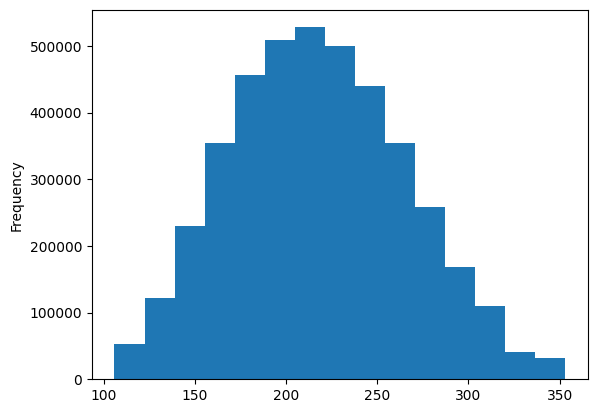

In [43]:
#Histograma com a distribuição da proficiencia_saeb
df_mt['proficiencia_saeb'].plot.hist(bins=15)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.


<Axes: xlabel='ano', ylabel='proficiencia_saeb'>

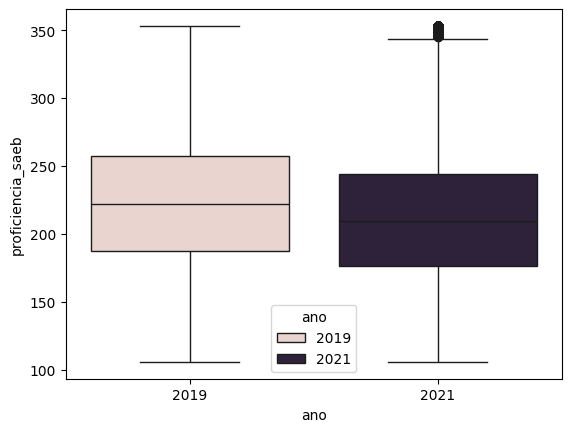

In [46]:
#Boxplot da proficiencia por ano da prova colorido pelo ano
#df_mt.boxplot(column='proficiencia_saeb',by='ano')
sns.boxplot(x='ano',y='proficiencia_saeb',hue='ano',data=df_mt)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.


<Axes: xlabel='escola_publica', ylabel='proficiencia_saeb'>

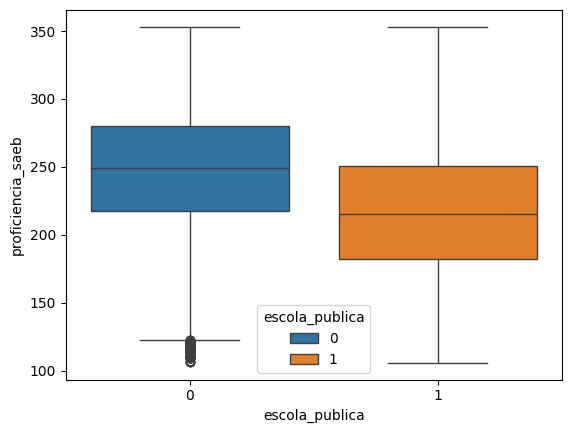

In [49]:
#Boxplot da proficiencia por tipo de escola
sns.boxplot(x='escola_publica',y='proficiencia_saeb',hue='escola_publica',data=df_mt)

In [ ]:
#Ajustando a coluna Idade
dicionario_idade={'*':'Nulo','.':'Branco','A':'9 anos ou menos','B':'10 anos','C':'11 anos','D':'12 anos','E':'13 anos','F':'14 anos'}
df_mt['idade'] = df_mt['idade'].map(dicionario_idade)

In [72]:
df_mt['idade'].value_counts()

,count
idade,
11 anos,963395
10 anos,703015
12 anos,152810
13 anos,52312
Branco,50750
14 anos,32361
9 anos ou menos,12642
Nulo,3844


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a 

<Axes: xlabel='idade', ylabel='proficiencia_saeb'>

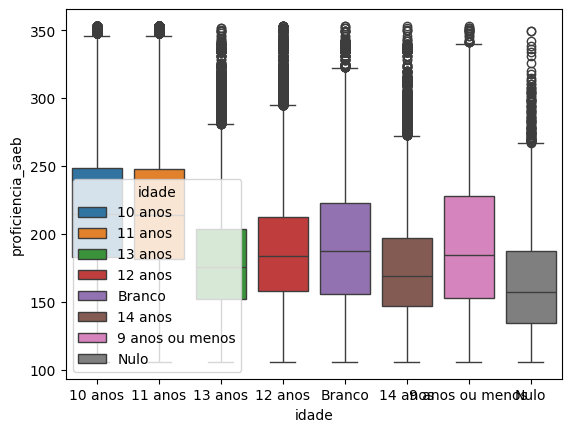

In [73]:
#Boxplot da proficiencia por idade
sns.boxplot(x='idade',y='proficiencia_saeb',hue='idade',data=df_mt)

### Plotnine

Documentação [aqui](https://plotnine.org/)


/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 15944 rows containing non-finite values.


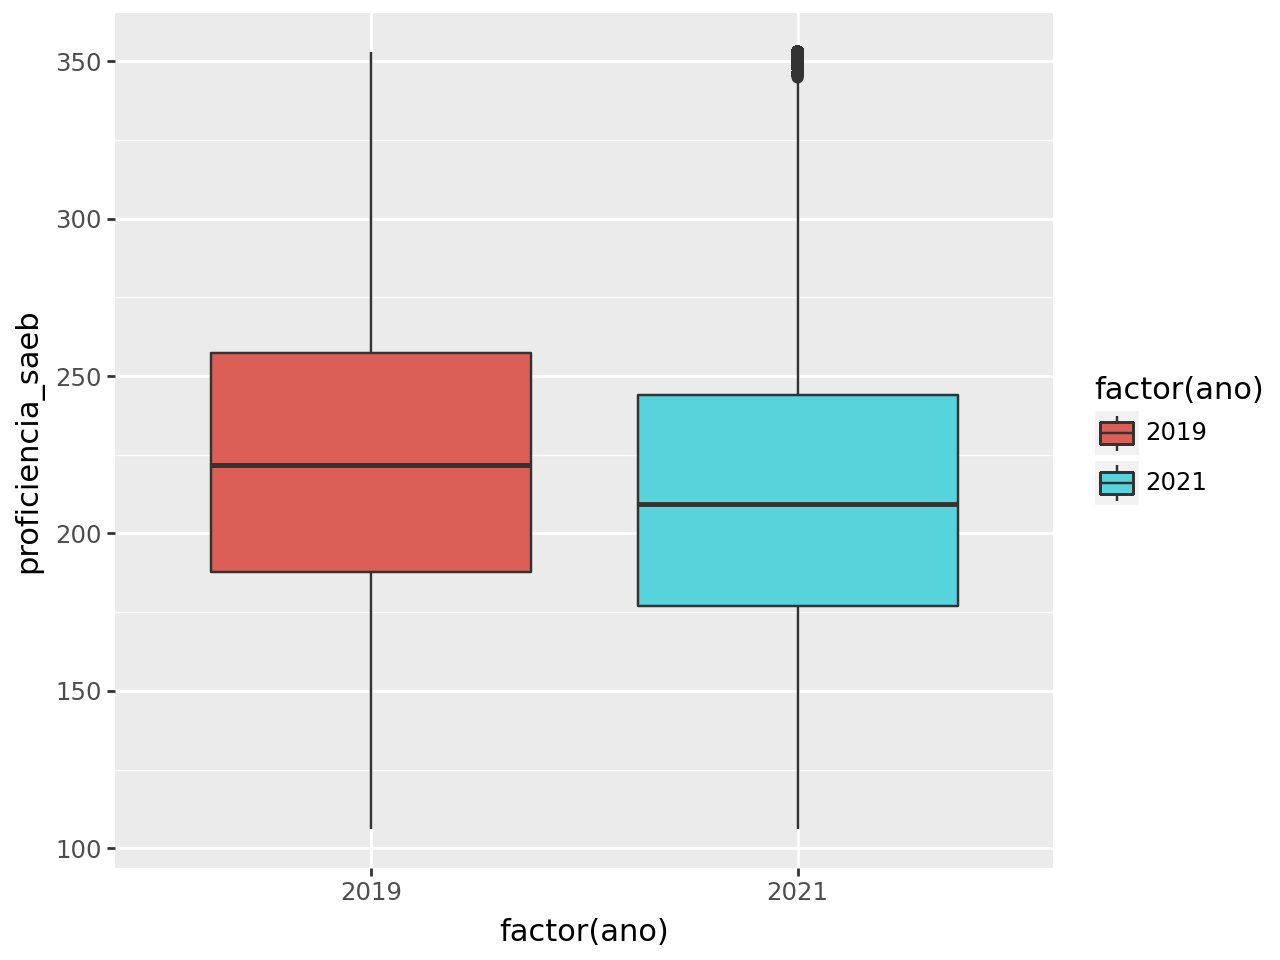

In [55]:
(ggplot(df_mt, aes(x='factor(ano)', y='proficiencia_saeb',fill='factor(ano)'))
  + geom_boxplot())

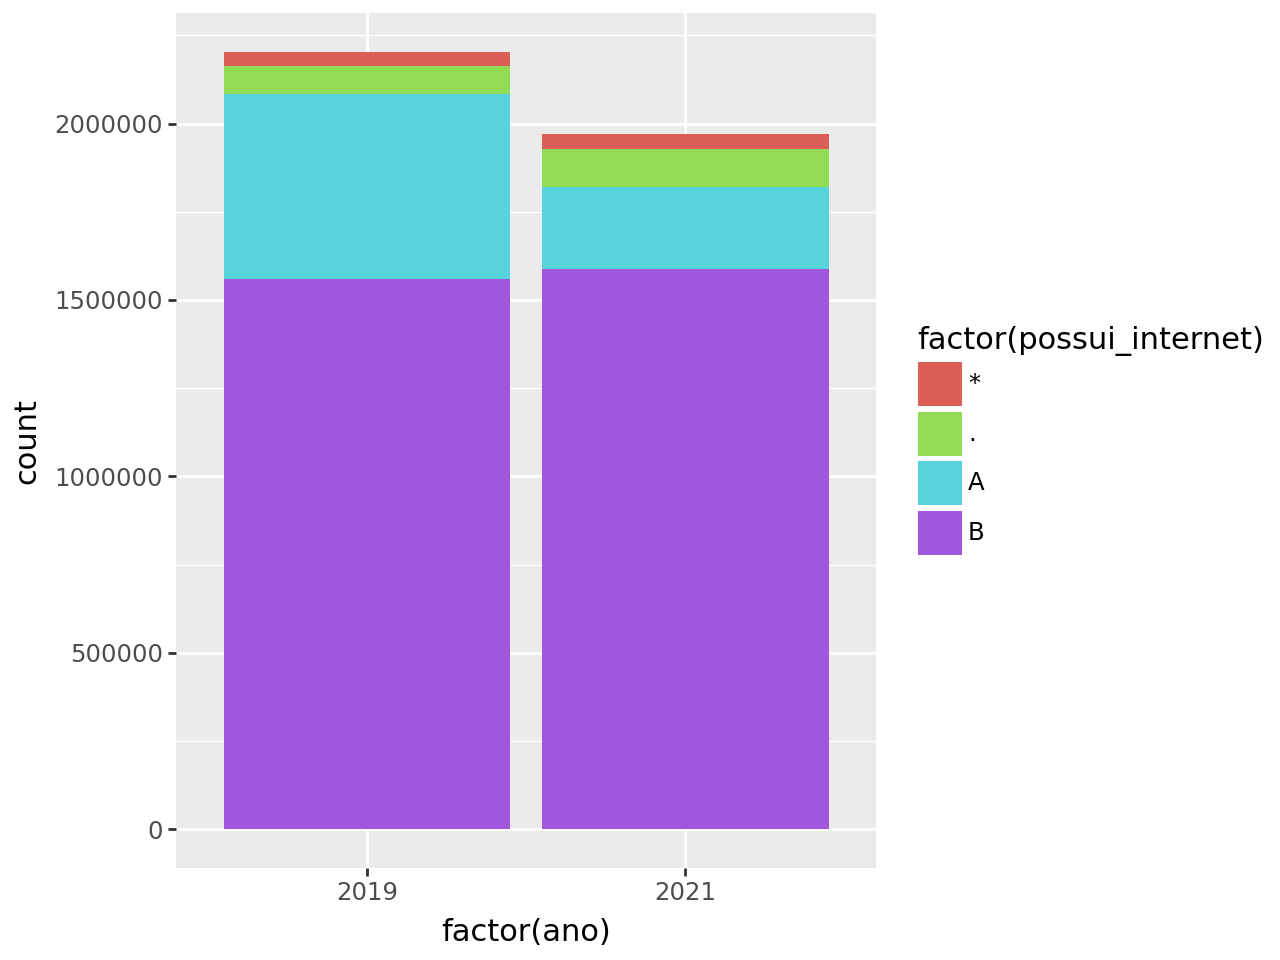

In [57]:
#Gráfico de barras com % de alunos com internet ao longo dos anos
(ggplot(df_mt, aes(x='factor(ano)', fill='factor(possui_internet)'))
  + geom_bar())

In [ ]:
#Ajustando os valores da coluna possui_internet
dicionario = {'*': 'Nulo', '.': 'Branco', 'A': 'Não', 'B': 'Sim'}
df_mt['possui_internet'] = df_mt['possui_internet'].map(dicionario)

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 15944 rows containing non-finite values.


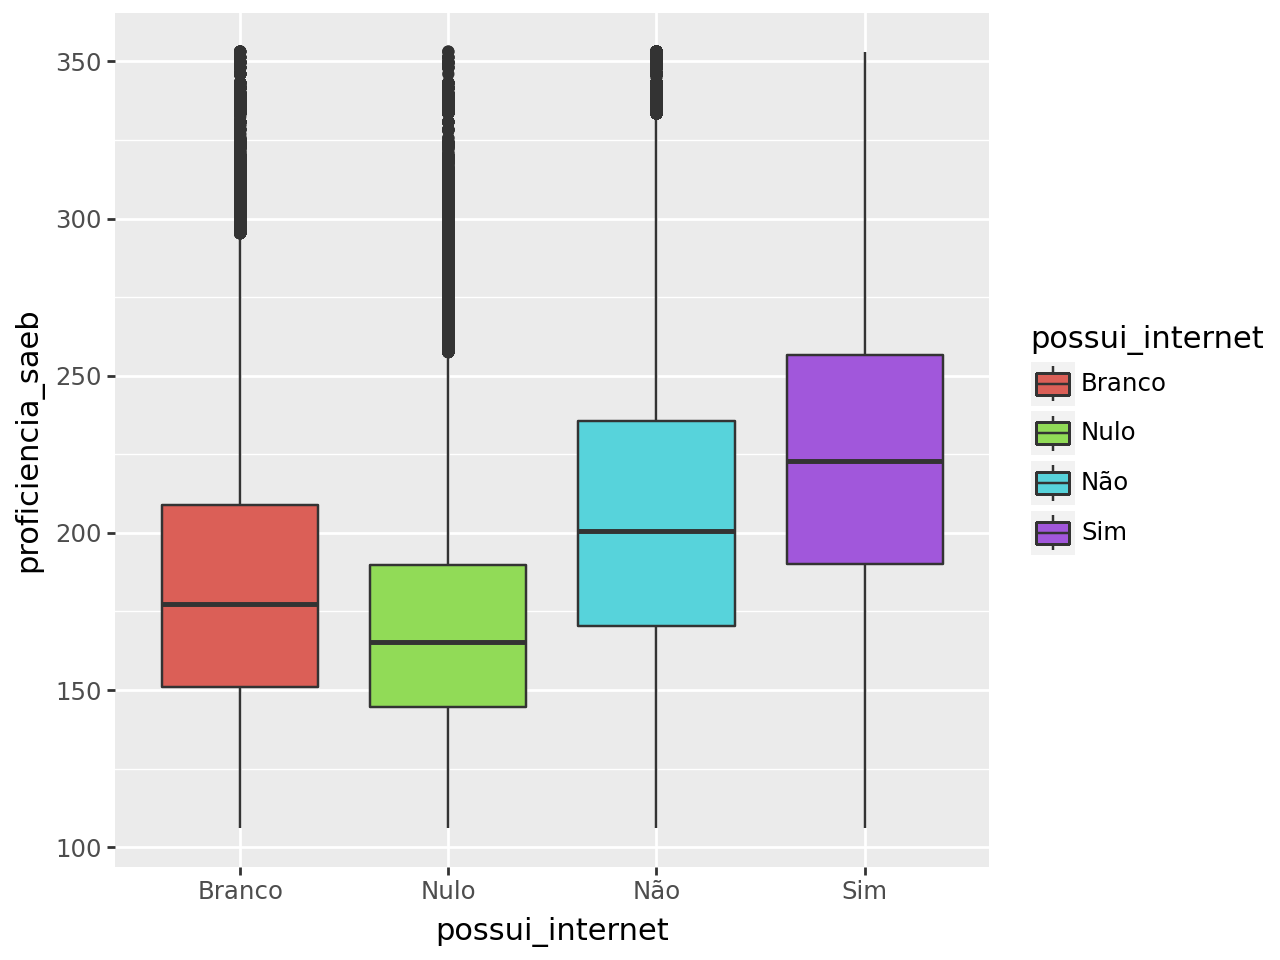

In [62]:
(ggplot(df_mt, aes(x='possui_internet', y='proficiencia_saeb',fill='possui_internet'))
  + geom_boxplot())

In [59]:
df_mt.columns

Index(['ano', 'sigla_uf', 'id_aluno', 'disciplina', 'escola_publica',
       'preenchimento_caderno', 'presenca', 'indicador_proficiencia',
       'proficiencia_saeb', 'desempenho_aluno', 'preenchimento_questionario',
       'sexo', 'raca_cor', 'idade', 'faixa_etaria',
       'quantidade_pessoas_domicilio', 'possui_moradia_rua_urbanizada',
       'possui_eletrecidade', 'possui_internet', 'possui_computador',
       'possui_tablet', 'possui_telefone', 'possui_celular',
       'escolaridade_mae', 'escolaridade_pai', 'escolaridade_pessoa',
       'tempo_chegada_escola'],
      dtype='object')

# Para saber mais

- [Polars](https://github.com/pola-rs/polars)
- [Base dos Dados - SAEB](https://basedosdados.org/dataset/e083c9a2-1cee-4342-bedc-535cbad6f3cd?table=7e387db7-20ba-4130-bb37-83485a62f1bc)
- [Microdados INEP - gov.br](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/saeb)
